# Final Project
    MD Sakif Al Mohaimen - 201861408
    Sohayib Sazid Fahim - 202148771

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
import geopandas as gpd


In [2]:
df = pd.read_csv('flights.csv')
df

,id,date,airport_code,airport_name,airport_province,location,region,latitude,longitude,incident_type,...,aircraft_type,aircraft_model,aircraft_make,organization,operator_type,operation_type,destination_airport_code,destination_airport_name,departure_airport_code,departure_airport_name
0,156615,2022-12-10 14:06:00,YUL,Pierre Elliott Trudeau Intl,QUEBEC,Montreal,QUEBEC,45.470556,73.740833,SMOKE OR FIRE (iii),...,AEROPLANE,737-200,BOEING,AIR INUIT,COMMERCIAL,AIR TRANSPORT,YPX,PUVIRNITUQ,YUL,Pierre Elliott Trudeau Intl
1,156604,2022-11-07 19:20:00,YGP,Gaspé (Michel-Pouliot),QUEBEC,GASPÉ,QUEBEC,48.775278,64.479722,EMERGENCY/PRIORITY (xi),...,AEROPLANE,BA 32-12,BRITISH AEROSPACE,PASCAN AVIATION,COMMERCIAL,AIR TRANSPORT,YGR,ÎLES-DE-LA-MADELEINE,YGP,Gaspé (Michel-Pouliot)
2,156603,2022-11-07 18:51:00,YMT,CHIBOUGAMAU/CHAPAIS,QUEBEC,CHIBOUGAMAU,QUEBEC,49.771944,74.528056,EMERGENCY/PRIORITY (xi),...,AEROPLANE,A100,BEECH,PROPAIR,COMMERCIAL,AIR TRANSPORT,YGL,LA GRANDE RIVIÈRE,YVP,KUUJJUAQ
3,156599,2022-12-04 19:15:00,SU3,St-Hyacinthe,QUEBEC,St-Hyacinthe,QUEBEC,45.606667,73.015000,ENGINE (i),...,AEROPLANE,DA42,DIAMOND,CARGAIR - CARGAIR,COMMERCIAL,TRAINING,YHU,St-Hubert,YSC,SHERBROOKE
4,156593,2022-12-04 12:20:00,NF4,(Lindsay),ONTARIO,Kawartha Lakes,ONTARIO,44.364722,78.783889,PILOT ERROR / WEATHER / MECHANICAL,...,AEROPLANE,172I,CESSNA,DURHAM FLIGHT CENTRE,PRIVATE,PLEASURE/TRAVEL,NF4,(Lindsay),YOO,Oshawa Executive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,92840,1998-03-03 08:00:00,YZU,WHITECOURT,ALBERTA,WHITECOURT,WESTERN,54.233333,116.300000,RUNWAY EXCURSION (v),...,AEROPLANE,550,CESSNA,SUNWEST INTERNATIONAL AVIATION SERVICES,COMMERCIAL,AIR TRANSPORT,YZU,WHITECOURT,YYC,Calgary Intl
10151,92834,1998-03-10 06:04:00,YUL,Pierre Elliott Trudeau Intl,QUEBEC,Montreal,QUEBEC,45.766667,74.233333,ENGINE (i),...,AEROPLANE,550,CESSNA,EXECAIRE (DORVAL),COMMERCIAL,BUSINESS,YUL,Pierre Elliott Trudeau Intl,YUL,Pierre Elliott Trudeau Intl
10152,92833,1998-02-28 12:00:00,YXH,MEDICINE HAT,ALBERTA,MEDICINE HAT,WESTERN,50.016667,110.450000,PILOT ERROR / WEATHER / MECHANICAL,...,BASIC ULTRALIGHT,SKYE RYDER,SIX-CHUTER,PERSONAL CARRIER / NON-ORGANIZATION,PRIVATE,PLEASURE/TRAVEL,YXH,MEDICINE HAT,YXH,MEDICINE HAT
10153,92827,1998-02-24 18:50:00,YEG,Edmonton Intl,ALBERTA,Edmonton,WESTERN,53.500000,113.950000,EMERGENCY/PRIORITY (xi),...,AEROPLANE,CL-600-2A12 (CHALLENGER 601),CANADAIR,AIR CANADA,COMMERCIAL,AIR TRANSPORT,YEG,Edmonton Intl,YYC,Calgary Intl


## Broad Goal
#### Where should efforts be focused to improve the safety of Canadian air space?
And here we have broken down the goal into two subgoals:
- To identify the type of aircraft caused the serious incidents and the locations
where these were reported.
- To identify top 10 most common reasons for the incidents over the last 25 years,
including aircraft manufacturer and model.

In [3]:
# Checking if there is any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10155 non-null  int64  
 1   date                      10155 non-null  object 
 2   airport_code              10155 non-null  object 
 3   airport_name              10155 non-null  object 
 4   airport_province          10155 non-null  object 
 5   location                  10155 non-null  object 
 6   region                    10155 non-null  object 
 7   latitude                  10155 non-null  float64
 8   longitude                 10155 non-null  float64
 9   incident_type             10155 non-null  object 
 10  reportable_incident       10155 non-null  object 
 11  incident_country          10155 non-null  object 
 12  serious_incident          10155 non-null  object 
 13  damage                    10155 non-null  object 
 14  total_

### Converting dates into Years

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df.head()

,id,date,airport_code,airport_name,airport_province,location,region,latitude,longitude,incident_type,...,aircraft_model,aircraft_make,organization,operator_type,operation_type,destination_airport_code,destination_airport_name,departure_airport_code,departure_airport_name,year
0,156615,2022-12-10 14:06:00,YUL,Pierre Elliott Trudeau Intl,QUEBEC,Montreal,QUEBEC,45.470556,73.740833,SMOKE OR FIRE (iii),...,737-200,BOEING,AIR INUIT,COMMERCIAL,AIR TRANSPORT,YPX,PUVIRNITUQ,YUL,Pierre Elliott Trudeau Intl,2022
1,156604,2022-11-07 19:20:00,YGP,Gaspé (Michel-Pouliot),QUEBEC,GASPÉ,QUEBEC,48.775278,64.479722,EMERGENCY/PRIORITY (xi),...,BA 32-12,BRITISH AEROSPACE,PASCAN AVIATION,COMMERCIAL,AIR TRANSPORT,YGR,ÎLES-DE-LA-MADELEINE,YGP,Gaspé (Michel-Pouliot),2022
2,156603,2022-11-07 18:51:00,YMT,CHIBOUGAMAU/CHAPAIS,QUEBEC,CHIBOUGAMAU,QUEBEC,49.771944,74.528056,EMERGENCY/PRIORITY (xi),...,A100,BEECH,PROPAIR,COMMERCIAL,AIR TRANSPORT,YGL,LA GRANDE RIVIÈRE,YVP,KUUJJUAQ,2022
3,156599,2022-12-04 19:15:00,SU3,St-Hyacinthe,QUEBEC,St-Hyacinthe,QUEBEC,45.606667,73.015000,ENGINE (i),...,DA42,DIAMOND,CARGAIR - CARGAIR,COMMERCIAL,TRAINING,YHU,St-Hubert,YSC,SHERBROOKE,2022
4,156593,2022-12-04 12:20:00,NF4,(Lindsay),ONTARIO,Kawartha Lakes,ONTARIO,44.364722,78.783889,PILOT ERROR / WEATHER / MECHANICAL,...,172I,CESSNA,DURHAM FLIGHT CENTRE,PRIVATE,PLEASURE/TRAVEL,NF4,(Lindsay),YOO,Oshawa Executive,2022


In [5]:
df['aircraft_type'].unique()

array(['AEROPLANE', 'HELICOPTER', 'UAS - Rotary Wing', 'GLIDER',
       'ADVANCED ULTRALIGHT', 'UAS – OTHER/UNKNOWN', 'BALLOON',
       'BASIC ULTRALIGHT', 'GYROPLANE', 'UAS - Fixed Wing',
       'OTHER/UNKNOWN', 'HANG GLIDER', 'AIRSHIP'], dtype=object)

## How this visualizations will help with the goals of the project.
1. <b>Identifying high-risk areas:</b> By visualizing the locations where accidents have occurred, the fourth visualization helps in identifying high-risk areas within Canada's airspace. This information can be used to focus safety       efforts and resources in these areas.
2. <b>Tracking changes over time:</b> The slider in the visualization allows the user to track changes in the number and severity of accidents over the past 25 years. This information can help identify trends and patterns, which can inform decision-making around safety measures and policies.
3. <b>Prioritizing response efforts:</b> By categorizing accidents based on severity (Minor, Substantial, Destroyed), the visualization can help prioritize response efforts. For example, areas with a higher number of substantial or destroyed accidents may require more immediate attention and resources to improve safety.

## 1. Which aircraft caused the most injuries in a single flight?
- This visualization describes how many injuries occurred in a flight by different aircrafts.
- By comparing the number of injuries caused by each aircraft type, we can see which types are more likely to   cause harm in the event of an incident.
- It's important to note that this visualization only shows injuries that occurred in a single flight, and       doesn't take into account incidents that involved multiple flights.

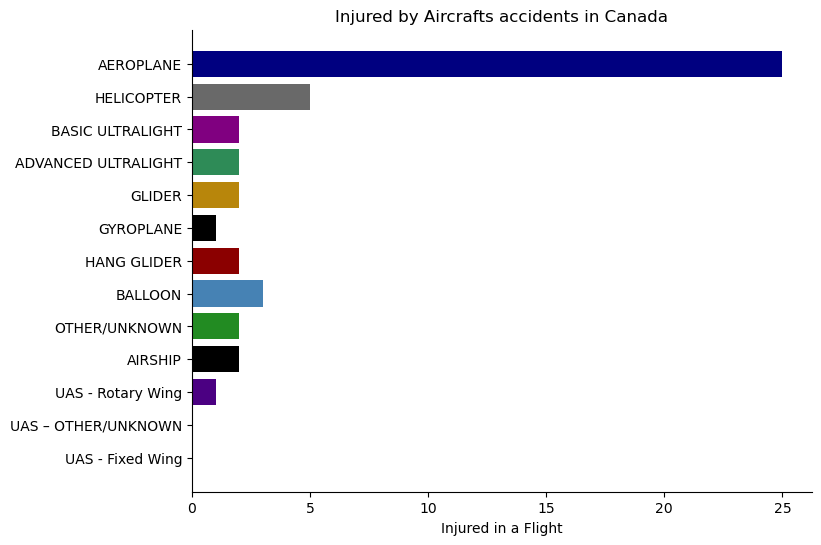

In [6]:
aircraft = ['AEROPLANE', 'HELICOPTER','BASIC ULTRALIGHT', 'ADVANCED ULTRALIGHT','GLIDER','GYROPLANE','HANG GLIDER','BALLOON','OTHER/UNKNOWN', 
         'AIRSHIP','UAS - Rotary Wing','UAS – OTHER/UNKNOWN',
         'UAS - Fixed Wing']
colors = ['navy', 'dimgrey', 'purple', 'seagreen', 'darkgoldenrod', 'black', 'darkred', 'steelblue', 'forestgreen', 'black',
         'indigo', 'blue', 'orange']
i = 0
fig, ax = plt.subplots(figsize=(8,6))
while i < len(aircraft):
    new_df = df[df['aircraft_type'] == aircraft[i]]
    ax.barh(new_df['aircraft_type'], new_df['total_injured'], color = colors[i])
    i = i + 1

ax.invert_yaxis()
ax.set_xlabel('Injured in a Flight')
ax.set_title('Injured by Aircrafts accidents in Canada')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#fig.savefig('Injured by Aircrafts accidents in Canada.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
adf = df[df['aircraft_type'] == 'AEROPLANE']
adf.head()

,id,date,airport_code,airport_name,airport_province,location,region,latitude,longitude,incident_type,...,aircraft_model,aircraft_make,organization,operator_type,operation_type,destination_airport_code,destination_airport_name,departure_airport_code,departure_airport_name,year
0,156615,2022-12-10 14:06:00,YUL,Pierre Elliott Trudeau Intl,QUEBEC,Montreal,QUEBEC,45.470556,73.740833,SMOKE OR FIRE (iii),...,737-200,BOEING,AIR INUIT,COMMERCIAL,AIR TRANSPORT,YPX,PUVIRNITUQ,YUL,Pierre Elliott Trudeau Intl,2022
1,156604,2022-11-07 19:20:00,YGP,Gaspé (Michel-Pouliot),QUEBEC,GASPÉ,QUEBEC,48.775278,64.479722,EMERGENCY/PRIORITY (xi),...,BA 32-12,BRITISH AEROSPACE,PASCAN AVIATION,COMMERCIAL,AIR TRANSPORT,YGR,ÎLES-DE-LA-MADELEINE,YGP,Gaspé (Michel-Pouliot),2022
2,156603,2022-11-07 18:51:00,YMT,CHIBOUGAMAU/CHAPAIS,QUEBEC,CHIBOUGAMAU,QUEBEC,49.771944,74.528056,EMERGENCY/PRIORITY (xi),...,A100,BEECH,PROPAIR,COMMERCIAL,AIR TRANSPORT,YGL,LA GRANDE RIVIÈRE,YVP,KUUJJUAQ,2022
3,156599,2022-12-04 19:15:00,SU3,St-Hyacinthe,QUEBEC,St-Hyacinthe,QUEBEC,45.606667,73.015000,ENGINE (i),...,DA42,DIAMOND,CARGAIR - CARGAIR,COMMERCIAL,TRAINING,YHU,St-Hubert,YSC,SHERBROOKE,2022
4,156593,2022-12-04 12:20:00,NF4,(Lindsay),ONTARIO,Kawartha Lakes,ONTARIO,44.364722,78.783889,PILOT ERROR / WEATHER / MECHANICAL,...,172I,CESSNA,DURHAM FLIGHT CENTRE,PRIVATE,PLEASURE/TRAVEL,NF4,(Lindsay),YOO,Oshawa Executive,2022


In [8]:
# creating a new data frame for only serious incidents
incident = adf[adf.serious_incident == 'Yes']
incident

,id,date,airport_code,airport_name,airport_province,location,region,latitude,longitude,incident_type,...,aircraft_model,aircraft_make,organization,operator_type,operation_type,destination_airport_code,destination_airport_name,departure_airport_code,departure_airport_name,year
0,156615,2022-12-10 14:06:00,YUL,Pierre Elliott Trudeau Intl,QUEBEC,Montreal,QUEBEC,45.470556,73.740833,SMOKE OR FIRE (iii),...,737-200,BOEING,AIR INUIT,COMMERCIAL,AIR TRANSPORT,YPX,PUVIRNITUQ,YUL,Pierre Elliott Trudeau Intl,2022
10,156572,2022-11-03 17:25:00,SH2,ÎLE-AUX-GRUES,QUEBEC,ÎLE-AUX-GRUES,QUEBEC,47.066667,70.533333,PILOT ERROR / WEATHER / MECHANICAL,...,185 F,CESSNA,PERSONAL CARRIER / NON-ORGANIZATION,PRIVATE,PLEASURE/TRAVEL,SH2,ÎLE-AUX-GRUES,SH2,ÎLE-AUX-GRUES,2022
12,156567,2022-11-24 11:30:00,AJ8,PITT MEADOWS,BRITISH COLUMBIA,PITT MEADOWS,PACIFIC,49.216111,122.712778,PILOT ERROR / WEATHER / MECHANICAL,...,PA-28-140,PIPER,Amy’s Flying School Ltd.,COMMERCIAL,TRAINING,AJ8,PITT MEADOWS,AJ8,PITT MEADOWS,2022
15,156562,2022-11-22 23:00:00,YGM,Industrial Park,MANITOBA,Gimli,CENTRAL,50.628056,97.043333,PILOT ERROR / WEATHER / MECHANICAL,...,172M,CESSNA,LS Airways Flight Academy,COMMERCIAL,TRAINING,YGM,Industrial Park,YGM,Industrial Park,2022
29,156525,2022-11-06 11:30:00,YYD,SMITHERS,BRITISH COLUMBIA,SMITHERS,PACIFIC,54.825278,127.182778,DIFFICULT TO CONTROL (iv),...,DHC-8-311,De Havilland Aircraft of Canada,NORTH CARIBOO FLYING SERVICE,COMMERCIAL,AIR TRANSPORT,YYD,SMITHERS,YVR,Vancouver Intl,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10125,93050,1998-03-23 16:00:00,YGK,KINGSTON,ONTARIO,KINGSTON,ONTARIO,44.366667,76.983333,PILOT ERROR / WEATHER / MECHANICAL,...,PC-12/45,PILATUS,SAMARITAN AIR SERVICE,COMMERCIAL,AIR AMBULANCE/ EMERGENCY MEDICAL,YGK,KINGSTON,YGK,KINGSTON,1998
10127,93017,1998-04-06 09:00:00,ZSJ,SANDY LAKE,ONTARIO,SANDY LAKE,CENTRAL,53.100000,93.566667,PILOT ERROR / WEATHER / MECHANICAL,...,HS 748 SE,HAWKER SIDDELEY,WASAYA AIRWAYS,COMMERCIAL,AIR TRANSPORT,YRL,Red Lake,ZSJ,SANDY LAKE,1998
10128,93003,1998-04-01 12:50:00,YDA,DAWSON CITY,YUKON,DAWSON CITY,WESTERN,64.066667,139.200000,PILOT ERROR / WEATHER / MECHANICAL,...,UNKNOWN,UNKNOWN,PERSONAL CARRIER / NON-ORGANIZATION,PRIVATE,PLEASURE/TRAVEL,YDA,DAWSON CITY,YDA,DAWSON CITY,1998
10129,93002,1998-04-02 09:20:00,YXX,ABBOTSFORD,BRITISH COLUMBIA,ABBOTSFORD,PACIFIC,49.033333,122.600000,PILOT ERROR / WEATHER / MECHANICAL,...,170B,CESSNA,PERSONAL CARRIER / NON-ORGANIZATION,COMMERCIAL,TRAINING,YXX,ABBOTSFORD,YXX,ABBOTSFORD,1998


In [9]:
# top 10 causes for incidents/accidents
top_causes = incident['incident_type'].value_counts().nlargest(10)
top_causes

PILOT ERROR / WEATHER / MECHANICAL    2355
SMOKE OR FIRE (iii)                    153
EMERGENCY/PRIORITY (xi)                150
ENGINE (i)                              74
RUNWAY EXCURSION (v)                    42
DIFFICULT TO CONTROL (iv)               38
DEPRESSURIZATION (vii)                  29
UNABLE TO PERFORM (vi)                  27
RISK OF COLLISION (x)                   21
COLLISION (x)                           11
Name: incident_type, dtype: int64

## 2. Where in Canada are the highest number of accidents occurring?
- The heat map shows the distribution of accidents across different regions of Canada over the last 25 years.
- The heat map provides a quick overview of which regions have a higher risk of accidents, and which ones have a lower risk.

In [10]:
pivot_table = adf.pivot_table(values = 'total_injured', aggfunc = 'sum', index = 'region', columns = 'year')
pivot_table.iloc[2:3,] = 0
pivot_table = pivot_table.sort_values(by=[1999], ascending=True)

pivot_table

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
region,,,,,,,,,,,,,,,,,,,,,
FOREIGN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATLANTIC,0.0,1.0,7.0,0.0,1.0,2.0,2.0,4.0,0.0,1.0,...,0.0,3.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0
CENTRAL,1.0,1.0,6.0,12.0,3.0,2.0,6.0,3.0,5.0,8.0,...,5.0,8.0,2.0,12.0,32.0,1.0,5.0,0.0,3.0,7.0
WESTERN,2.0,1.0,5.0,10.0,10.0,4.0,5.0,3.0,11.0,10.0,...,8.0,5.0,3.0,9.0,6.0,10.0,5.0,5.0,11.0,8.0
QUEBEC,6.0,5.0,1.0,2.0,1.0,6.0,6.0,6.0,8.0,3.0,...,6.0,4.0,16.0,11.0,16.0,4.0,13.0,3.0,8.0,9.0
PACIFIC,3.0,6.0,19.0,3.0,6.0,2.0,6.0,14.0,12.0,8.0,...,11.0,11.0,6.0,11.0,7.0,5.0,12.0,12.0,21.0,10.0
ONTARIO,4.0,14.0,10.0,14.0,4.0,20.0,16.0,15.0,6.0,9.0,...,7.0,7.0,7.0,10.0,16.0,12.0,28.0,6.0,4.0,5.0


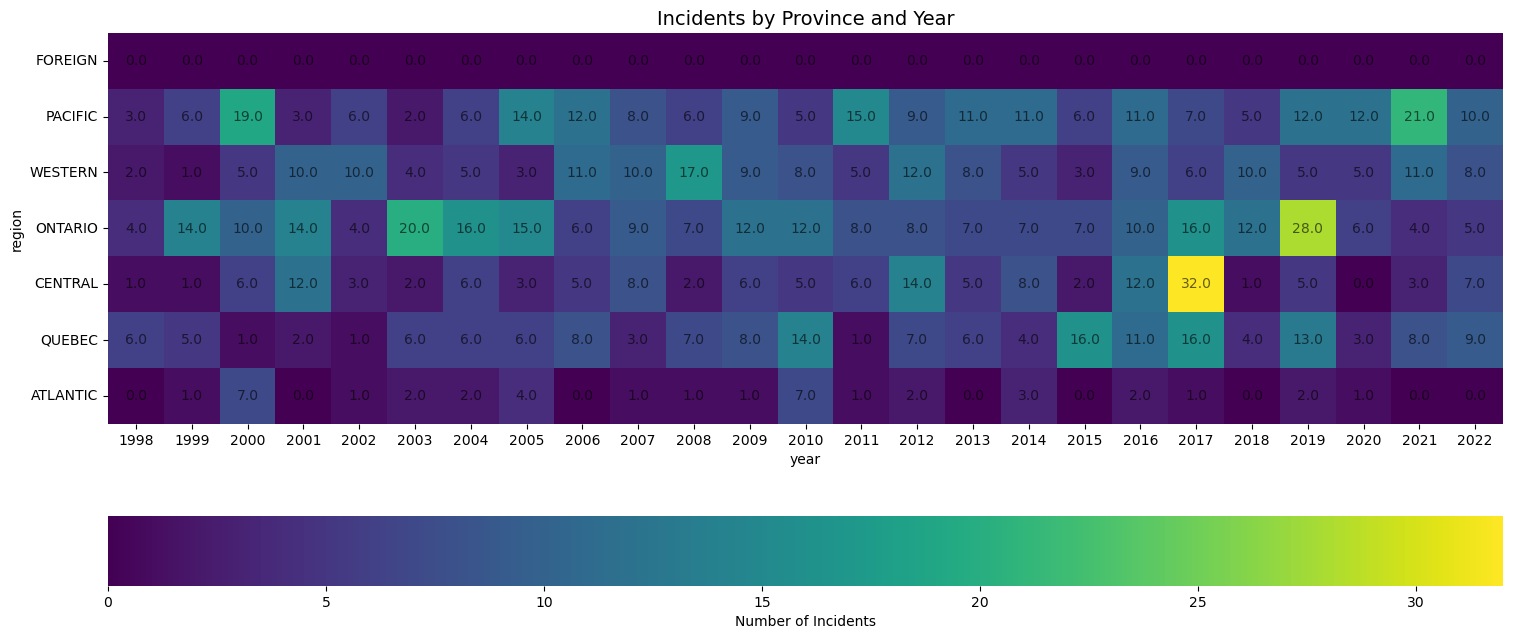

In [11]:
# order from west to east
order = ['FOREIGN', 'PACIFIC', 'WESTERN', 'ONTARIO', 'CENTRAL', 'QUEBEC', 'ATLANTIC']
pivot_table = pivot_table.reindex(order)

fig, ax = plt.subplots(figsize=(18,8),dpi = 100)
ax = sns.heatmap(pivot_table, cmap = 'viridis', cbar = True, 
                 cbar_kws={'orientation': 'horizontal', 'label': 'Number of Incidents'}, square = True, 
                 annot = True, annot_kws={'color':'black', 'alpha': 0.6}, fmt=".1f")


ax.set_title('Incidents by Province and Year', fontsize = 14)
#fig.savefig('Incidents by Province and Year.jpg', dpi=300, bbox_inches='tight')
plt.show()

## 3. Exploring Canadian Flight Accident Data: Top 10 Causes, Aircraft Manufacturers, and Models in Canada with the Highest Number of Incidents.
- This visualization allows the user to explore the top 10 most common causes of aviation incidents over the last 25 years, as well as the manufacturers and airlines involved in these incidents.
- This visualization can help identify patterns and trends in aviation incidents, and inform strategies for improving safety in Canadian air space.

In [12]:
# An interactive plot for top 10 causes for accidents

# An interactive plot for top 10 manufactureres faced accidents

# An interactive plot for top 10 models that faced accidents

colors = ['navy', 'dimgrey', 'indigo', 'seagreen', 'darkgoldenrod', 'darkred', 'steelblue', 'darkgrey', 'purple', 'blue']
@interact(x = (widgets.ToggleButtons(options=['Causes', 'Manufacturer', 'Model'], disabled = False, 
               description = 'Choose One:')))
def options(x):
        if (x == 'Causes'):
            top_causes = incident['incident_type'].value_counts().nlargest(10)
            pivot = pd.pivot_table(adf, index='year', columns='incident_type', values='id', aggfunc='count')
            pivot = pivot[top_causes.index]
            fig, ax = plt.subplots(figsize=(12, 10))
            pivot.plot(kind='bar', stacked=True, ax=ax, color = colors)
            ax.set_title('Top 10 Causes of Serious Incidents and Accidents')
            ax.legend(loc = 'upper left', frameon = False)
            ax.set_ylim(0,600)
            ax.set_xlabel('Year', fontsize = 16)
            ax.set_ylabel('Number of Incidents/Accidents', fontsize = 16)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            #fig.savefig('Top 10 Causes of Serious Incidents and Accidents.jpg', dpi=300, bbox_inches='tight')
        elif x == 'Manufacturer':
            top_causes = incident['aircraft_make'].value_counts().nlargest(10)
            pivot = pd.pivot_table(adf, index='year', columns='aircraft_make', values='id', aggfunc='count')
            pivot = pivot[top_causes.index]
            fig, ax = plt.subplots(figsize=(12, 10))
            pivot.plot(kind='bar', stacked=True, ax=ax, color = colors)
            ax.set_title('Top 10 Manufacturers that had Incidents and Accidents')
            ax.legend(loc = 'upper left', frameon = False)
            ax.set_ylim(0,500)
            ax.set_xlabel('Year', fontsize = 16)
            ax.set_ylabel('Number of Incidents/Accidents', fontsize = 16)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            #fig.savefig('Top 10 Manufacturers that had Incidents and Accidentsjpg', dpi=300, bbox_inches='tight')
        else:
            top_causes = incident['aircraft_model'].value_counts().nlargest(10)
            pivot = pd.pivot_table(adf, index='year', columns='aircraft_model', values='id', aggfunc='count')
            pivot = pivot[top_causes.index]
            fig, ax = plt.subplots(figsize=(12, 10))
            pivot.plot(kind='bar', stacked=True, ax=ax, color = colors)
            ax.set_title('Top 10 Model of Aeroplanes that had Incidents and Accidents')
            ax.legend(loc = 'upper left', frameon = False)
            ax.set_ylim(0,200)
            ax.set_xlabel('Year', fontsize = 16)
            ax.set_ylabel('Number of Incidents/Accidents', fontsize = 16)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            #fig.savefig('Top 10 Model of Aeroplanes that had Incidents and Accidents.jpg', dpi=300, bbox_inches='tight')

interactive(children=(ToggleButtons(description='Choose One:', options=('Causes', 'Manufacturer', 'Model'), va…

## 4. Provinces that faced damages due to Flight Accidents in Canada (1998-2020)
- This visualization uses a choropleth map of Canada to display the locations of damages type due flight accidents that occurred between 1998 and 2022.
- This visualization allows users to easily identify the provinces in Canada that have experienced the most damages and the severity of the flight accidents.
- It can be used to determine where efforts should be focused to improve the safety of Canadian air space.

In [13]:
canada_regions = gpd.read_file('canada.shp')

# canada_regions.plot()

# plt.title('Regions of Canada')

# plt.show()


In [14]:
canada_regions

,Province,geometry
0,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83095..."
1,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84274..."
2,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84748..."
3,New Brunswick,"MULTIPOLYGON (((8176224.537 1722553.460, 81786..."
4,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84007..."
5,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63918..."
6,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60385..."
7,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5452957.477..."
8,Alberta,"POLYGON ((5228304.177 2767597.891, 4890689.760..."
9,British Columbia,"MULTIPOLYGON (((4018904.414 3410247.271, 41867..."


In [15]:
incident.columns

Index(['id', 'date', 'airport_code', 'airport_name', 'airport_province',
       'location', 'region', 'latitude', 'longitude', 'incident_type',
       'reportable_incident', 'incident_country', 'serious_incident', 'damage',
       'total_injured', 'total_uninjured', 'aircraft_id', 'aircraft_type',
       'aircraft_model', 'aircraft_make', 'organization', 'operator_type',
       'operation_type', 'destination_airport_code',
       'destination_airport_name', 'departure_airport_code',
       'departure_airport_name', 'year'],
      dtype='object')

In [16]:
# Dropping the unnecessary columns for the geopandas plot 

new_df = incident.drop(columns = ['id', 'airport_code', 'airport_name', 'location', 'incident_type',
       'reportable_incident', 'incident_country', 'serious_incident', 'total_injured', 'total_uninjured', 'aircraft_id', 'aircraft_type',
       'aircraft_model', 'aircraft_make', 'organization', 'operator_type',
       'operation_type', 'destination_airport_code',
       'destination_airport_name', 'departure_airport_code',
       'departure_airport_name'])
new_df['Province'] = new_df['airport_province']
new_df = new_df.drop(columns = ['date', 'airport_province', 'region', 'latitude', 'longitude'])
new_df

,damage,year,Province
0,NONE,2022,QUEBEC
10,SUBSTANTIAL,2022,QUEBEC
12,SUBSTANTIAL,2022,BRITISH COLUMBIA
15,SUBSTANTIAL,2022,MANITOBA
29,NONE,2022,BRITISH COLUMBIA
...,...,...,...
10125,SUBSTANTIAL,1998,ONTARIO
10127,SUBSTANTIAL,1998,ONTARIO
10128,SUBSTANTIAL,1998,YUKON
10129,SUBSTANTIAL,1998,BRITISH COLUMBIA


In [17]:
canada_regions['Province'] = canada_regions['Province'].str.upper()
canada_regions

,Province,geometry
0,NEWFOUNDLAND AND LABRADOR,"MULTIPOLYGON (((8307365.589 2582136.711, 83095..."
1,PRINCE EDWARD ISLAND,"MULTIPOLYGON (((8435711.754 1679935.966, 84274..."
2,NOVA SCOTIA,"MULTIPOLYGON (((8470851.646 1624745.011, 84748..."
3,NEW BRUNSWICK,"MULTIPOLYGON (((8176224.537 1722553.460, 81786..."
4,QUEBEC,"MULTIPOLYGON (((8399709.494 2261445.703, 84007..."
5,ONTARIO,"MULTIPOLYGON (((6378815.614 2295412.440, 63918..."
6,MANITOBA,"MULTIPOLYGON (((6039656.509 2636304.343, 60385..."
7,SASKATCHEWAN,"POLYGON ((5248633.914 2767057.263, 5452957.477..."
8,ALBERTA,"POLYGON ((5228304.177 2767597.891, 4890689.760..."
9,BRITISH COLUMBIA,"MULTIPOLYGON (((4018904.414 3410247.271, 41867..."


In [18]:
damage_df = canada_regions.merge(new_df, on ='Province', how = 'left')

damage_df = damage_df.replace('NEWFOUNDLAND AND LABRADOR', 'NL')
damage_df = damage_df.replace('PRINCE EDWARD ISLAND', 'PE')
damage_df = damage_df.replace('NOVA SCOTIA', 'NS')
damage_df = damage_df.replace('NEW BRUNSWICK', 'NB')
damage_df = damage_df.replace('QUEBEC', 'QC')
damage_df = damage_df.replace('ONTARIO', 'ON')
damage_df = damage_df.replace('MANITOBA', 'MB')
damage_df = damage_df.replace('SASKATCHEWAN', 'SK')
damage_df = damage_df.replace('ALBERTA', 'AB')
damage_df = damage_df.replace('BRITISH COLUMBIA', 'BC')
damage_df = damage_df.replace('YUKON', 'YT')
damage_df = damage_df.replace('NORTHWEST TERRITORIES', 'NT')
damage_df = damage_df.replace('NUNAVUT', 'NU')
damage_df

,Province,geometry,damage,year
0,NL,"MULTIPOLYGON (((8307365.589 2582136.711, 83095...",NONE,2022
1,NL,"MULTIPOLYGON (((8307365.589 2582136.711, 83095...",SUBSTANTIAL,2022
2,NL,"MULTIPOLYGON (((8307365.589 2582136.711, 83095...",SUBSTANTIAL,2021
3,NL,"MULTIPOLYGON (((8307365.589 2582136.711, 83095...",NONE,2020
4,NL,"MULTIPOLYGON (((8307365.589 2582136.711, 83095...",NONE,2019
...,...,...,...,...
2917,NU,"MULTIPOLYGON (((6105932.626 3935743.411, 61114...",SUBSTANTIAL,2010
2918,NU,"MULTIPOLYGON (((6105932.626 3935743.411, 61114...",SUBSTANTIAL,2009
2919,NU,"MULTIPOLYGON (((6105932.626 3935743.411, 61114...",SUBSTANTIAL,2007
2920,NU,"MULTIPOLYGON (((6105932.626 3935743.411, 61114...",NONE,2007


In [19]:
damage_df['damage'].unique()

array(['NONE', 'SUBSTANTIAL', 'MINOR', 'UNKNOWN', 'DESTROYED'],
      dtype=object)

In [20]:
damage_df['year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2008, 2005, 2003, 2002, 2001, 2000, 1998, 2009, 2006,
       2007, 2004, 1999], dtype=int64)

In [21]:
years = [2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2008, 2005, 2004, 2003, 2002, 2001, 2000, 1998, 2009,
       2006, 2007, 1999]
years.sort()


@interact(x = (widgets.ToggleButtons(options=['MINOR', 'SUBSTANTIAL', 'DESTROYED'], disabled = False, 
               description = 'Choose One:')), y = widgets.IntSlider(min = 1998, max = 2022, step = 1))


def options(x,y):
    c = canada_regions.copy()
    
    c = c.replace('NEWFOUNDLAND AND LABRADOR', 'NL')
    c = c.replace('PRINCE EDWARD ISLAND', 'PE')
    c = c.replace('NOVA SCOTIA', 'NS')
    c = c.replace('NEW BRUNSWICK', 'NB')
    c = c.replace('QUEBEC', 'QC')
    c = c.replace('ONTARIO', 'ON')
    c = c.replace('MANITOBA', 'MB')
    c = c.replace('SASKATCHEWAN', 'SK')
    c = c.replace('ALBERTA', 'AB')
    c = c.replace('BRITISH COLUMBIA', 'BC')
    c = c.replace('YUKON', 'YT')
    c = c.replace('NORTHWEST TERRITORIES', 'NT')
    c = c.replace('NUNAVUT', 'NU')
    
    if y in years:
        if x == 'MINOR':
            a = damage_df[(damage_df['damage'] == 'MINOR') & (damage_df['year'] == y)].copy()
            a.loc[:,'damage'] = 1
            province_counts = a.groupby('Province')['damage'].count()
            a['Damage Count'] = a['Province'].map(province_counts)
    
        elif x == 'SUBSTANTIAL':
            a = damage_df[(damage_df['damage'] == 'SUBSTANTIAL') & (damage_df['year'] == y)].copy()
            a.loc[:,'damage'] = 1
            province_counts = a.groupby('Province')['damage'].count()
            a['Damage Count'] = a['Province'].map(province_counts)
    
        else:
            a = damage_df[(damage_df['damage'] == 'DESTROYED') & (damage_df['year'] == y)].copy()
            a.loc[:,'damage'] = 1
            province_counts = a.groupby('Province')['damage'].count()
            a['Damage Count'] = a['Province'].map(province_counts)

    
    c = c.merge(a[['Province', 'damage', 'year', 'Damage Count']], on = 'Province', how = 'left')
    c = c.fillna(0)
    
    
    fig, ax = plt.subplots(figsize=(15,10))
    c.plot(column = 'Damage Count', ax = ax, cmap = 'Blues', edgecolor='black', linewidth=0.5, 
           legend = True, legend_kwds={'label': "Number of Minor/Substantial/Destroyed type accidents",
                        'orientation': "vertical"})
    ax.set_title("Damage type of accidents in Canada's provinces")
    ax.set_axis_off();
    def add_province_names(x):
        ax.text(x.geometry.centroid.x, x.geometry.centroid.y, x['Province'], ha='center', va='center', fontsize=10, fontweight='bold')
    c.apply(add_province_names, axis=1)
    #fig.savefig("Damage type of accidents in Canada's provinces.jpg", dpi=300, bbox_inches='tight')

interactive(children=(ToggleButtons(description='Choose One:', options=('MINOR', 'SUBSTANTIAL', 'DESTROYED'), …